In [50]:
import pandas as pd
import numpy as np
#! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
df = pd.read_csv('automobile-data-set-clean-df.csv',encoding='utf-8')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-diesel.1
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


<h2>Analyzing Individual Feature Patterns using Visualization</h2>

In [51]:
df.dtypes

Unnamed: 0              int64
symboling               int64
normalized-losses       int64
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
horsepower-binned      object
fuel-type-diesel        int64
fuel-type-diesel.1      int64
dtype: object

<h3>Continuous numerical variables:</h3> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using <b>scatterplots</b> with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using <b>regplot</b>, which plots the scatterplot plus the fitted regression line for the data.</p>

<h4>Positive linear relationship</h4>

(0, 56233.384306580185)

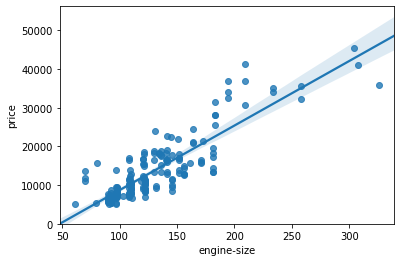

In [52]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [53]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.  We can examine the correlation between 'engine-size' and 'price' and it's approximately  0.87</p>

<h4>Negative linear relationship</h4>

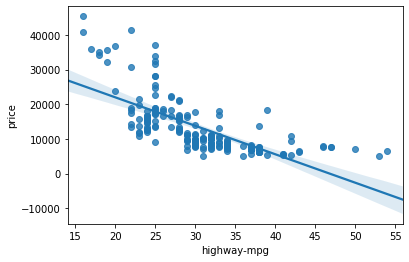

In [54]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [55]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<p>As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price. We can examine the correlation between 'highway-mpg' and 'price' and it's approximately  -0.704</p>

<h4>Weak linear relationship</h4>

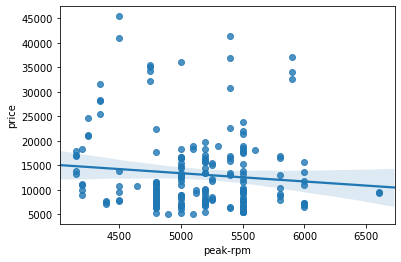

In [56]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [57]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable. We can examine the correlation between 'peak-rpm' and 'price' and it's approximately -0.101616 </p>

<h3>Categorical variables:</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using <b>boxplots</b>.</p>

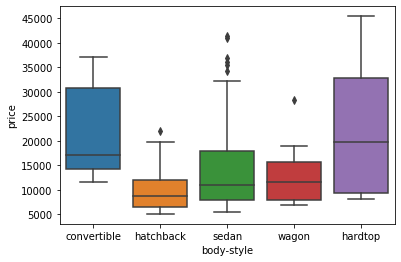

In [58]:
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price</p>

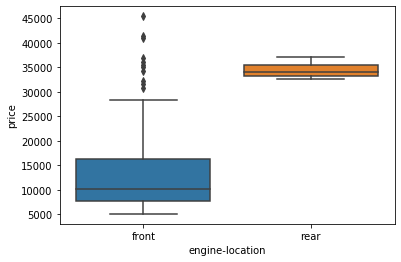

In [59]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>

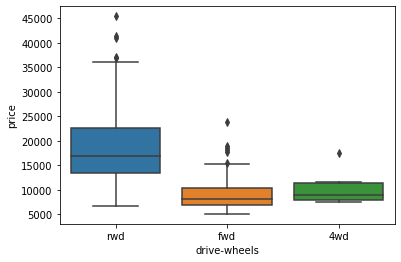

In [60]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>

<h3>Descriptive Statistical Analysis</h3>

<h4>Describe DataFrame</h4>
<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

In [61]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-diesel.1
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<p> The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object'.</p>

In [62]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


<h4>Value Counts</h4>
<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have.The method "value_counts" only works on Pandas series, not Pandas Dataframes.</p>

In [63]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [64]:
# save the results to the dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [65]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<h3>Grouping</h3>

In [66]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [67]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

<p>The average price for each of the different categories of data</p>

In [68]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

In [69]:
# grouping multiple variables
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a <b>pivot table</b>. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

In [70]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Let's use a <b>heat map</b> to visualize the pivot table</p>

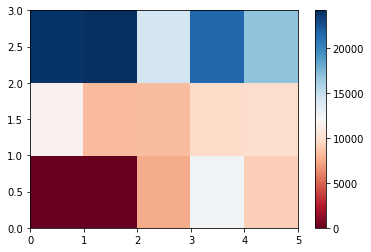

In [71]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

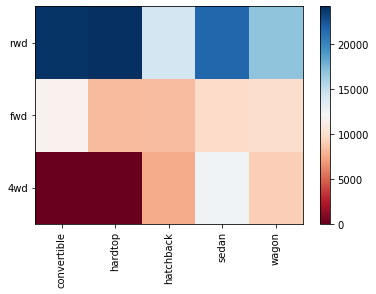

In [72]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3>Correlation and Causation</h3>

<h4>Pearson Correlation</h4>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [73]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-diesel.1
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.163636,0.144301,-0.022505,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458


<h4>P-value</h4> 
<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [74]:
from scipy import stats

<h4>Wheel-base vs Price</h4>

In [75]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

<h4>Horsepower vs Price</h4>

In [76]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

<h4>Length vs Price</h4>

In [77]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h4>Width vs Price</h4>

In [78]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522675  with a P-value of P = 9.200335510481123e-38


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751)</p>

<h4>Crub-weight vs Price</h4>

In [79]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8344145257702844  with a P-value of P =  2.189577238893878e-53


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834)</p>

<h4>Engine-size vs Price</h4>

In [80]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

<h4>Bore vs Price</h4>

In [81]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

<h4>City-mpg vs Price</h4>

In [82]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

<h4>Highway-mpg vs Price</h4>

In [83]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.</p>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>For strongly correlation, expect ANOVA to return a large F-test score and a small p-value.</p>

In [84]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [88]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [89]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [90]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


<h5>Conclusion:</h5>
<p>With a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance.</p>

In [92]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [93]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [94]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>